<a href="https://colab.research.google.com/github/YonseiESC/ESC-25SPRING/blob/main/kaggle_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('./tmdb_5000_movies.csv')
credit = pd.read_csv('./tmdb_5000_credits.csv')

In [ ]:
!ls

sample_data  tmdb_5000_credits.csv  tmdb_5000_movies.csv


In [ ]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credit.shape

(4803, 4)

In [ ]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
type(credit)

pandas.core.frame.DataFrame

In [ ]:
data = data.merge(credit, left_on='id', right_on='movie_id', how='left')

In [ ]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
data.shape

(4803, 24)

In [ ]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
data.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [ ]:
data = data.drop(['homepage'],axis=1)


In [ ]:
data_clean = data.dropna(subset = ['overview', 'release_date', 'runtime'])

In [ ]:
data_clean.shape

(4799, 23)

In [ ]:
train = data_clean.drop(['tagline'], axis = 1)

In [ ]:
train.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
import json
import pandas as pd

def extract_keys(column_data):
    unique_keys = set()
    for entry in column_data:
        if pd.isnull(entry):  # Null 값 있으면 패스. 어차피 상관없음.
            continue
        try:
            data = json.loads(entry) if isinstance(entry, str) else entry
            for item in data:
                unique_keys.update(item.keys())
        except (json.JSONDecodeError, TypeError):
            continue
    return unique_keys

In [ ]:
df = train

In [ ]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
import json
df['genres'] = df['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)


In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['production_companies'] = df['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['production_countries'] = df['production_countries'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['cast'] = df['cast'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

In [ ]:
df['genres'] = df['genres'].apply(lambda x: ', '.join([d['name'] for d in x]))

In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: ', '.join([d['name'] for d in x]))
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join([d['name'] for d in x]))
df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join([d['name'] for d in x]))
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ', '.join([d['name'] for d in x]))
df['cast'] = df['cast'].apply(lambda x: ', '.join([d['name'] for d in x]))
df.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Avatar,7.2,11800,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,148.0,"Français, English, Español, Italiano, Deutsch",Released,Spectre,6.3,4466,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,...,165.0,English,Released,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,...,132.0,English,Released,John Carter,6.1,2124,49529,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df = df.drop(['crew', 'title_y'], axis = 1)

In [ ]:
df.shape

(4799, 20)

In [ ]:
df = df[['budget', 'genres', 'popularity', 'production_companies',
                     'release_date', 'runtime', 'spoken_languages', 'cast',
                      'status', 'revenue','vote_average']]

In [ ]:
# 장르별 평균 평점 딕셔너리 생성
average_genre_rating_dict = dict(sorted_genre_rating)

# 영화별 장르 평균 평점 추가
def calculate_genre_avg_rating(genres_list):
    ratings = [average_genre_rating_dict.get(genre, 0) for genre in genres_list]
    return sum(ratings) / len(ratings) if ratings else 0

movies_filtered['genre_avg_rating'] = movies_filtered['genres_list'].apply(calculate_genre_avg_rating)

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['genres', 'production_companies', 'release_date', 'spoken_languages',
       'cast', 'status'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# OneHotEncoder 사용
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[object_cols])

# 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(object_cols))
print(encoded_df)

      genres_  genres_Action  genres_Action, Adventure  \
0         0.0            0.0                       0.0   
1         0.0            0.0                       0.0   
2         0.0            0.0                       0.0   
3         0.0            0.0                       0.0   
4         0.0            0.0                       0.0   
...       ...            ...                       ...   
4794      0.0            0.0                       0.0   
4795      0.0            0.0                       0.0   
4796      0.0            0.0                       0.0   
4797      1.0            0.0                       0.0   
4798      0.0            0.0                       0.0   

      genres_Action, Adventure, Animation, Comedy, Family  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0    

In [ ]:
no_text = df.drop(object_cols, axis = 1)
no_text.head()

,budget,popularity,runtime,revenue,vote_average
0,237000000,150.437577,162.0,2787965087,7.2
1,300000000,139.082615,169.0,961000000,6.9
2,245000000,107.376788,148.0,880674609,6.3
3,250000000,112.312950,165.0,1084939099,7.6
4,260000000,43.926995,132.0,284139100,6.1


In [ ]:
df = no_text.merge(encoded_df, left_index=True, right_index=True)
df

,budget,popularity,runtime,revenue,vote_average,genres_,genres_Action,"genres_Action, Adventure","genres_Action, Adventure, Animation, Comedy, Family","genres_Action, Adventure, Animation, Comedy, Family, Fantasy, Romance",...,"cast_Zhang Ziyi, Gong Li, Youki Kudoh, Tsai Chin, Suzuka Ohgo, Ken Watanabe, Michelle Yeoh, Navia Nguyen, Koji Yakusho, Kaori Momoi, Zoe Weizenbaum, Cary-Hiroyuki Tagawa, Kenneth Tsang, Randall Duk Kim, Paul Adelstein, Ted Levine, Samantha Futerman, Karl Yune, Togo Igawa, Elizabeth Sung, Eugenia Yuan","cast_Zhang Ziyi, Leehom Wang, Ruby Lin, Yao Chen, Ada Choi, Terri Kwan, Ryan Zheng Kai, Jack Kao Kuo-Hsin, Morris Rong Xiang, Liu Hua, Zhang Jin, Wang Baoqiang, Wang Ji, Ma Wei-Jiang, Singh Hartihan Bitto, Alfred Hsing","cast_Zoe Kazan, Mark Rendall, Maryann Urbano, Hunter Canning, Franklin Pipp, Kay Goldberg, Margot Ruth Tenenbaum, Nichael Alexander Eisner, Genevieve T. Eisner, Caseyarnoux Charlot, Caroline Elaine","cast_Zoe Lister-Jones, Daryl Wein, Julie White, Andrea Martin, Peter Friedman, LaChanze, Ebon Moss-Bachrach, Olivia Thirlby, Pablo Schreiber, Heather Burns, Tate Ellington, Francis Benhamou, David Call, Sam Rosen, Max Jenkins","cast_Zoe Saldana, Cliff Curtis, Callum Blue, Michael Vartan, Lennie James, Amandla Stenberg, Graham McTavish, Jesse Borrego, Cynthia Addai-Robinson, Ofelia Medina, Jordi Mollà, Affif Ben Badra, Max Martini, Charles Maquignon, Beto Benitez, Sam Douglas, Angel Garnica, Mark De Alessandro","cast_Zoe Sloane, Jade Viggiano, Amancaya Aguilar, Kahiry Bess, Alisha Naragsheth, Alyssa Wheeldon, Samuel Soifer, Kellie Geradi, Greg Crowe, Andrew Greiche, Adesuwa Addy Iyare, James Leibow, Jalani McNair, Mike MacAllister, Carl Alleyne, Kelli Chaves, Peter Zerneck, Hassan Brown, James Ransone","cast_Zooey Deschanel, Will Ferrell, Ed Harris, Amy Madigan, Amelia Warner, John Bedford Lloyd, Deirdre O'Connell, Mandy Siegfried, Dallas Roberts, Ivan Martin, Mary Jo Deschanel, Sam Bottoms, Anthony Rapp, Rachel Dratch, Michael Chernus",status_Post Production,status_Released,status_Rumored
0,237000000,150.437577,162.0,2787965087,7.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,300000000,139.082615,169.0,961000000,6.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,245000000,107.376788,148.0,880674609,6.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,250000000,112.312950,165.0,1084939099,7.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,260000000,43.926995,132.0,284139100,6.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,0,0.166513,82.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4795,0,0.918116,98.0,0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4796,7000,23.307949,77.0,424760,6.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4797,0,0.022173,80.0,0,7.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = df.drop(['vote_average'], axis = 1)
y = df['vote_average']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1308862853364439


In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6757971574556831


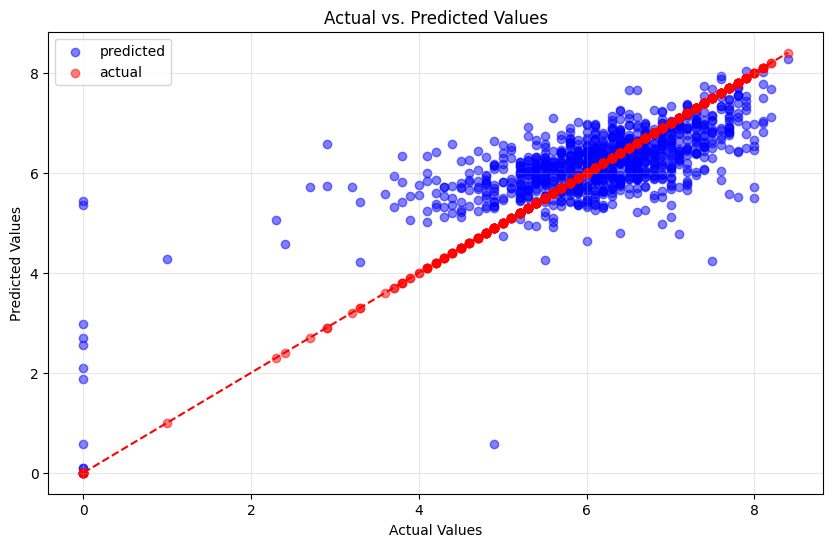

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='predicted', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='actual', color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

plt.grid(alpha=0.3)
plt.show()

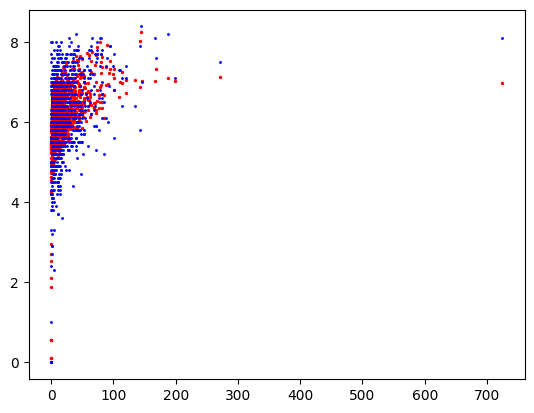

In [ ]:
import matplotlib.pyplot as plt

plt.scatter( X_test['popularity'], y_pred ,  color='red', s = 2)
plt.scatter( X_test['popularity'], y_test ,  color='blue', s = 1.1)

#['budget', 'genres', 'popularity', 'production_companies', 'release_date', 'runtime', 'spoken_languages', 'cast', 'status', 'revenue',]
# 위의 변수가 영화 평점에 영향을 미치는 주요 원소라고 볼 수 있다.

# 좀더 정확하게 변수의 분석을 위해 아래의 코드를 사용하여 AIC를 계산하고 전진선택법을 수행할 수 있다

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression

# 예시 데이터 생성
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])

# 전진 선택법 함수
def forward_selection(X, y):
    initial_features = X.columns.tolist()
    selected_features = []
    remaining_features = initial_features.copy()
    best_aic = np.inf
    current_iter = 0

    while remaining_features:
        aic_values = []
        
        for feature in remaining_features:
            # 모델 훈련
            features_to_use = selected_features + [feature]
            X_train = X[features_to_use]
            X_train = sm.add_constant(X_train)  # 상수항 추가
            model = sm.OLS(y, X_train).fit()

            # AIC 값 저장
            aic_values.append((feature, model.aic))

        # 가장 낮은 AIC 값을 가진 피처 선택
        best_feature, best_aic_new = min(aic_values, key=lambda x: x[1])

        # AIC가 개선되면 피처 추가
        if best_aic_new < best_aic:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_aic = best_aic_new
        else:
            # 더 이상 개선되지 않으면 종료
            break
        
        current_iter += 1
        print(f"Iteration {current_iter}: Selected Features: {selected_features}")
    
    # 최종 선택된 피처
    return selected_features

# 전진 선택법 실행
selected_features = forward_selection(X, y)
print("\nSelected Features:", selected_features)

object데이터를 더 자세히 분석하기 위해서 아래의 코드를 실행할 수 있다.
# 장르별 평균 평점 딕셔너리 생성
average_genre_rating_dict = dict(sorted_genre_rating)

# 영화별 장르 평균 평점 추가
def calculate_genre_avg_rating(genres_list):
    ratings = [average_genre_rating_dict.get(genre, 0) for genre in genres_list]
    return sum(ratings) / len(ratings) if ratings else 0

movies_filtered['genre_avg_rating'] = movies_filtered['genres_list'].apply(calculate_genre_avg_rating)

수치형 데이터의 이상치 등을 표준화하는 방법을 사용하여 모델의 성능을 높일 수 있다.

In [ ]:
df_last = df[['budget',  'popularity', 'runtime',  'revenue']].merge(data[['vote_count']], left_index=True, right_index=True)
df_last.head()

,budget,popularity,runtime,revenue,vote_count
0,237000000,150.437577,162.0,2787965087,11800
1,300000000,139.082615,169.0,961000000,4500
2,245000000,107.376788,148.0,880674609,4466
3,250000000,112.312950,165.0,1084939099,9106
4,260000000,43.926995,132.0,284139100,2124
